## FRNAKENSTEIN

### Nominaciones

La cinta fue nominada oficialmente en las siguientes categorías:

- Mejor Película
- Mejor Actor de Reparto, por la actuación de Jacob Elordi
- Mejor Guion Adaptado
- Mejor Fotografía
- Mejor Banda Sonora Original
- Mejor Diseño de Vestuario
- Mejor Maquillaje y Peinado
- Mejor Diseño de Producción
- Mejor Sonido


https://www.milenio.com/cine/premios-oscar/frankenstein-nominaciones-que-tuvo-la-pelicula-de-guillermo-del-toro

### Carga de datos inicial

En esta primera fase se cargan los tres conjuntos de datos obtenidos mediante técnicas de web scraping, 
correspondientes a distintas fuentes de opinión y cobertura mediática sobre la película *Frankenstein*.

Las fuentes utilizadas son:

- **Google News**: artículos y noticias de medios digitales, representativos de la cobertura periodística
  y del discurso más institucional o crítico.
- **IMDb**: reseñas de usuarios con un perfil más cinéfilo, que suelen incluir valoraciones detalladas
  sobre aspectos técnicos y narrativos de la película.
- **YouTube**: comentarios de usuarios en vídeos relacionados con la película, caracterizados por un
  lenguaje más informal y emocional, útil para analizar el nivel de engagement y conversación social.

Esta separación por fuentes se mantiene desde el inicio, ya que cada una cumple un papel distinto dentro
del análisis y permitirá extraer insights específicos para la estrategia de marketing.


In [2]:
import pandas as pd
import os

# Ruta a la carpeta de datos
DATA_PATH = "Data"

# Cargar los tres datasets
df_news = pd.read_excel(os.path.join(DATA_PATH, "Frankenstein_Google_News.xlsx"))
df_imdb = pd.read_excel(os.path.join(DATA_PATH, "frankenstein_reviews_IMDB.xlsx"))
df_youtube = pd.read_excel(os.path.join(DATA_PATH, "youtube_comments_EnN6DL2Z7vA.xlsx"))

# Vista rápida
print("Google News:", df_news.shape)
print("IMDb:", df_imdb.shape)
print("YouTube:", df_youtube.shape)


Google News: (581, 6)
IMDb: (1000, 5)
YouTube: (172, 9)


### Exploración de los datos

Antes de iniciar cualquier proceso de limpieza o análisis de texto, es necesario
realizar una exploración inicial de la estructura de los datos.

Este paso permite:
- Identificar las columnas disponibles en cada conjunto de datos.
- Localizar la variable que contiene el texto relevante para el análisis
  (noticias, reseñas o comentarios).
- Detectar posibles diferencias de formato entre fuentes, lo cual condicionará
  las etapas posteriores de limpieza y normalización.

Dado que cada fuente presenta características distintas, este análisis se realiza
de forma independiente para cada dataset.


In [3]:
# Google News
display(df_news.head())
display(df_news.columns)

# IMDb
display(df_imdb.head())
display(df_imdb.columns)

# YouTube
display(df_youtube.head())
display(df_youtube.columns)


,Titular,Fuente,Fecha,URL,Query_Busqueda,Fecha_Extraccion
0,Guillermo Del Toro Confirms New Version Of Net...,Screen Rant,"Thu, 29 Jan 2026 23:30:35 GMT",https://news.google.com/rss/articles/CBMiiAFBV...,Frankenstein 2025 movie Guillermo del Toro,2026-01-30 16:46:38
1,Guillermo Del Toro Wows Netflix’s Sundance Par...,hollywoodreporter.com,"Tue, 27 Jan 2026 06:08:33 GMT",https://news.google.com/rss/articles/CBMiuwFBV...,Frankenstein 2025 movie Guillermo del Toro,2026-01-30 16:46:38
2,Guillermo del Toro’s ‘Frankenstein’ Is Returni...,IndieWire,"Thu, 15 Jan 2026 08:00:00 GMT",https://news.google.com/rss/articles/CBMipAFBV...,Frankenstein 2025 movie Guillermo del Toro,2026-01-30 16:46:38
3,Guillermo del Toro Is Stitching Together a ‘Fr...,Bloody Disgusting,"Wed, 28 Jan 2026 15:19:35 GMT",https://news.google.com/rss/articles/CBMiswFBV...,Frankenstein 2025 movie Guillermo del Toro,2026-01-30 16:46:38
4,Media Monday: Guillermo del Toro's 'Frankenste...,thepenn.org,"Tue, 27 Jan 2026 20:15:00 GMT",https://news.google.com/rss/articles/CBMi_gFBV...,Frankenstein 2025 movie Guillermo del Toro,2026-01-30 16:46:38


Index(['Titular', 'Fuente', 'Fecha', 'URL', 'Query_Busqueda',
       'Fecha_Extraccion'],
      dtype='object')

,Fuente,URL_Reseña,Rating_Usuario,Título_Reseña,Texto
0,IMDB,https://www.imdb.com/es-es/title/tt1312221/rev...,8.0,"Guillermo Del Toro Breathes Tragic, Terrifying...",NaN
1,IMDB,https://www.imdb.com/es-es/title/tt1312221/rev...,8.0,A Symphony,What a stunning piece of art!\n\nThis film is ...
2,IMDB,https://www.imdb.com/es-es/title/tt1312221/rev...,8.0,Gothic Horror is Back!,"First off, I love a modern gothic horror adapt..."
3,IMDB,https://www.imdb.com/es-es/title/tt1312221/rev...,9.0,Finally...,"Holy s***. Finally, after a bunch of okay, med..."
4,IMDB,https://www.imdb.com/es-es/title/tt1312221/rev...,10.0,Very close,Finally someone came very close to capturing t...


Index(['Fuente', 'URL_Reseña', 'Rating_Usuario', 'Título_Reseña', 'Texto'], dtype='object')

,type,comment_id,parent_id,author,author_channel_url,like_count,published_at,updated_at,text
0,top_level,UgyQ6sg_djh2ZcTTwlF4AaABAg,NaN,@mtigua,http://www.youtube.com/@mtigua,0,2026-01-13T19:23:20Z,2026-01-13T19:23:20Z,Al final de quien mismo estaba enamorada la ti...
1,top_level,UgyG5Qyyoqs7RD_EvTt4AaABAg,NaN,@santicao8377,http://www.youtube.com/@santicao8377,1,2026-01-10T11:16:31Z,2026-01-10T11:16:31Z,"Yo he visto la película y me encantó, esa es m..."
2,top_level,UgxjcGWtyqdIjVgQhKR4AaABAg,NaN,@chuck6764,http://www.youtube.com/@chuck6764,0,2025-12-22T09:35:53Z,2025-12-22T09:35:53Z,que peli más malaaaaaaaaaaaaaaa.... en 1854 te...
3,top_level,UgyMBO87o_iqRPFuFLl4AaABAg,NaN,@azazel-35,http://www.youtube.com/@azazel-35,0,2025-12-18T13:43:36Z,2025-12-18T13:43:36Z,santiago segura sale en esta peli pero en que ...
4,top_level,UgxQM1dyDQh8C0JCj1B4AaABAg,NaN,@nicolaslaux9840,http://www.youtube.com/@nicolaslaux9840,0,2025-12-17T19:16:25Z,2025-12-17T19:16:25Z,"Que película tan estupida, ni un puto sentido"


Index(['type', 'comment_id', 'parent_id', 'author', 'author_channel_url',
       'like_count', 'published_at', 'updated_at', 'text'],
      dtype='object')

#### Columnas de texto por fuente

Google News
- Texto principal: Titular

IMDb
- Texto principal: Texto
- Extra útil (más adelante): Rating_Usuario

YouTube
- Texto principal: text
- Extras útiles: like_count, published_at

### Unificacion y creacion columna text_raw y source

Con el objetivo de unificar el tratamiento del texto en las distintas fuentes,
se crea una nueva columna denominada `text_raw`, que contiene el contenido
textual original de cada dataset sin ningún tipo de procesamiento.

Adicionalmente, se incorpora una variable `source` que identifica la procedencia
del texto (Google News, IMDb o YouTube). Esta variable será clave para realizar
comparaciones posteriores entre fuentes y analizar diferencias en el discurso
mediático y social.

En esta fase no se aplica ninguna técnica de limpieza, con el fin de preservar
el texto original como referencia.


In [4]:
# Copia de seguridad del texto original
df_news["text_raw"] = df_news["Titular"]
df_news["source"] = "Google News"

df_imdb["text_raw"] = df_imdb["Texto"]
df_imdb["source"] = "IMDb"

df_youtube["text_raw"] = df_youtube["text"]
df_youtube["source"] = "YouTube"

# Comprobación
display(df_news[["text_raw", "source"]].head())
display(df_imdb[["text_raw", "source"]].head())
display(df_youtube[["text_raw", "source"]].head())
#falta la de puntuación media

,text_raw,source
0,Guillermo Del Toro Confirms New Version Of Net...,Google News
1,Guillermo Del Toro Wows Netflix’s Sundance Par...,Google News
2,Guillermo del Toro’s ‘Frankenstein’ Is Returni...,Google News
3,Guillermo del Toro Is Stitching Together a ‘Fr...,Google News
4,Media Monday: Guillermo del Toro's 'Frankenste...,Google News


,text_raw,source
0,NaN,IMDb
1,What a stunning piece of art!\n\nThis film is ...,IMDb
2,"First off, I love a modern gothic horror adapt...",IMDb
3,"Holy s***. Finally, after a bunch of okay, med...",IMDb
4,Finally someone came very close to capturing t...,IMDb


,text_raw,source
0,Al final de quien mismo estaba enamorada la ti...,YouTube
1,"Yo he visto la película y me encantó, esa es m...",YouTube
2,que peli más malaaaaaaaaaaaaaaa.... en 1854 te...,YouTube
3,santiago segura sale en esta peli pero en que ...,YouTube
4,"Que película tan estupida, ni un puto sentido",YouTube


# Sentimiento General

In [5]:
def clean_text(s: str) -> str:
    s = str(s).strip()
    if s.upper() in ["N/A", "NA", "NONE", "NULL", ""]:
        return ""
    return s

for d in [df_imdb, df_youtube, df_news]:
    d["text_raw"] = d["text_raw"].apply(clean_text)

df_imdb = df_imdb[df_imdb["text_raw"] != ""].copy()
df_youtube = df_youtube[df_youtube["text_raw"] != ""].copy()
df_news = df_news[df_news["text_raw"] != ""].copy()

In [7]:
common_cols = ["text_raw", "source"]

df_all = pd.concat([
    df_news[common_cols],
    df_imdb[common_cols],
    df_youtube[common_cols]
], ignore_index=True, sort=False)

In [8]:
df_all = df_all.dropna(subset=["text_raw"])
df_all["text_raw"] = df_all["text_raw"].astype(str)

df_all = df_all[df_all["text_raw"].str.upper() != "N/A"]
df_all = df_all[df_all["text_raw"].str.strip() != ""]

In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

df_all["sentiment_score"] = df_all["text_raw"].apply(
    lambda x: sia.polarity_scores(x)["compound"]
)

def label_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df_all["sentiment_label"] = df_all["sentiment_score"].apply(label_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adeyarza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
sentiment_dist = (
    df_all
    .groupby(["source", "sentiment_label"])
    .size()
    .reset_index(name="n")
)

sentiment_dist["share"] = (
    sentiment_dist["n"] /
    sentiment_dist.groupby("source")["n"].transform("sum")
)

display(sentiment_dist.sort_values(["source", "share"], ascending=[True, False]))

,source,sentiment_label,n,share
2,Google News,Positive,275,0.473322
1,Google News,Neutral,180,0.309811
0,Google News,Negative,126,0.216867
5,IMDb,Positive,699,0.699000
4,IMDb,Neutral,186,0.186000
3,IMDb,Negative,115,0.115000
7,YouTube,Neutral,118,0.686047
6,YouTube,Negative,33,0.191860
8,YouTube,Positive,21,0.122093


In [11]:
mean_sentiment = (
    df_all
    .groupby("source")["sentiment_score"]
    .mean()
    .sort_values(ascending=False)
)

display(mean_sentiment)

source
IMDb           0.539343
Google News    0.155651
YouTube       -0.035215
Name: sentiment_score, dtype: float64

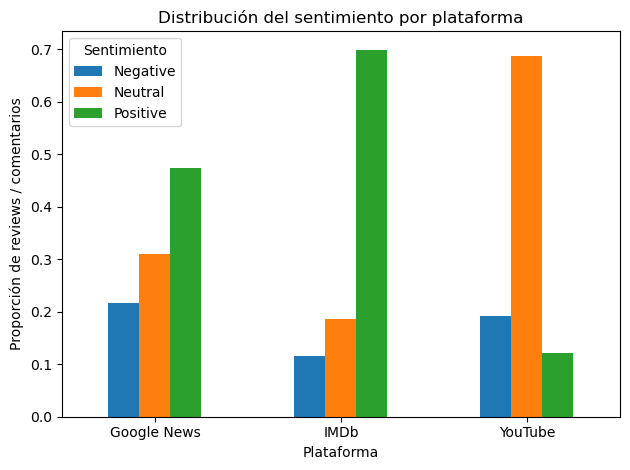

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Agrupar sentimiento por plataforma
sentiment_dist = (
    df_all
    .groupby(["source", "sentiment_label"])
    .size()
    .reset_index(name="n")
)

# 2️⃣ Calcular proporciones dentro de cada plataforma
sentiment_dist["share"] = (
    sentiment_dist["n"] /
    sentiment_dist.groupby("source")["n"].transform("sum")
)

# 3️⃣ Pivot para formato gráfico
sentiment_pivot = sentiment_dist.pivot(
    index="source",
    columns="sentiment_label",
    values="share"
)

# 4️⃣ Gráfico de barras
sentiment_pivot.plot(kind="bar")

plt.title("Distribución del sentimiento por plataforma")
plt.ylabel("Proporción de reviews / comentarios")
plt.xlabel("Plataforma")
plt.xticks(rotation=0)
plt.legend(title="Sentimiento")

plt.tight_layout()
plt.show()

# Separación por categorías

Conversión a diccionario 

In [15]:
import pandas as pd
import re

# 1) Cargar diccionario (cada columna = categoría, cada celda = keyword)
dict_path = "Dictionary.xlsx"
df_dict = pd.read_excel(dict_path)

# 2) Convertir a {categoria: [keywords...]} limpiando vacíos
categories = {}
for col in df_dict.columns:
    kws = (
        df_dict[col]
        .dropna()
        .astype(str)
        .str.strip()
    )
    kws = [k for k in kws if k and k.upper() != "N/A"]
    categories[col] = kws

categories.keys(), {k: len(v) for k, v in categories.items()}

(dict_keys(['ACTING / PERFORMANCES', 'SCREENPLAY / STORY', 'CINEMATOGRAPHY & VISUALS', 'PRODUCTION DESIGN & COSTUMES', 'MUSIC & SOUND']),
 {'ACTING / PERFORMANCES': 29,
  'SCREENPLAY / STORY': 28,
  'CINEMATOGRAPHY & VISUALS': 33,
  'PRODUCTION DESIGN & COSTUMES': 31,
  'MUSIC & SOUND': 27})

In [16]:
def normalize_text(s: str) -> str:
    s = str(s).lower()
    s = re.sub(r"\s+", " ", s).strip()
    return s

def build_pattern(keywords):
    # Escapa keywords y las une en un OR. Ordena por longitud para priorizar frases.
    kws = sorted([k.lower().strip() for k in keywords if k], key=len, reverse=True)
    kws_esc = [re.escape(k) for k in kws]
    # Nota: \b funciona bien para palabras; para frases también suele ir ok si empiezan/terminan con letras/números.
    return re.compile(r"(?i)\b(" + "|".join(kws_esc) + r")\b")

patterns = {cat: build_pattern(kws) for cat, kws in categories.items()}

In [17]:
# Normaliza texto una vez
df_all["text_norm"] = df_all["text_raw"].apply(normalize_text)

# Crear columnas binarias por categoría
for cat, pat in patterns.items():
    df_all[cat] = df_all["text_norm"].apply(lambda t: 1 if pat.search(t) else 0)

# (opcional) categoría "None" si no cae en ninguna
cat_cols = list(categories.keys())
df_all["NoCategory"] = (df_all[cat_cols].sum(axis=1) == 0).astype(int)

df_all[["source", "text_raw"] + cat_cols + ["NoCategory"]].head()

,source,text_raw,ACTING / PERFORMANCES,SCREENPLAY / STORY,CINEMATOGRAPHY & VISUALS,PRODUCTION DESIGN & COSTUMES,MUSIC & SOUND,NoCategory
0,Google News,Guillermo Del Toro Confirms New Version Of Net...,0,1,0,0,0,0
1,Google News,Guillermo Del Toro Wows Netflix’s Sundance Par...,1,0,0,0,0,0
2,Google News,Guillermo del Toro’s ‘Frankenstein’ Is Returni...,0,1,0,0,0,0
3,Google News,Guillermo del Toro Is Stitching Together a ‘Fr...,0,1,0,0,0,0
4,Google News,Media Monday: Guillermo del Toro's 'Frankenste...,0,1,0,0,0,0


In [18]:
share_by_source_cat = (
    df_all
    .groupby("source")[cat_cols]
    .mean()
    .sort_index()
)

display(share_by_source_cat)

,ACTING / PERFORMANCES,SCREENPLAY / STORY,CINEMATOGRAPHY & VISUALS,PRODUCTION DESIGN & COSTUMES,MUSIC & SOUND
source,,,,,
Google News,0.213425,0.573150,0.037866,0.043029,0.043029
IMDb,0.555000,0.732000,0.458000,0.360000,0.287000
YouTube,0.029070,0.069767,0.011628,0.000000,0.005814


In [19]:
# Sentimiento medio condicionado a que la categoría esté mencionada
rows = []
for src in df_all["source"].unique():
    dsrc = df_all[df_all["source"] == src]
    for cat in cat_cols:
        subset = dsrc[dsrc[cat] == 1]
        if len(subset) > 0:
            rows.append({
                "source": src,
                "category": cat,
                "n_texts": len(subset),
                "mean_sentiment": subset["sentiment_score"].mean()
            })

df_cat_sent = pd.DataFrame(rows).sort_values(["source", "mean_sentiment"], ascending=[True, False])
display(df_cat_sent)

,source,category,n_texts,mean_sentiment
0,Google News,ACTING / PERFORMANCES,124,0.176401
1,Google News,SCREENPLAY / STORY,333,0.131661
2,Google News,CINEMATOGRAPHY & VISUALS,22,0.124282
3,Google News,PRODUCTION DESIGN & COSTUMES,25,0.106192
4,Google News,MUSIC & SOUND,25,-0.029644
8,IMDb,PRODUCTION DESIGN & COSTUMES,360,0.699716
5,IMDb,ACTING / PERFORMANCES,555,0.674684
7,IMDb,CINEMATOGRAPHY & VISUALS,458,0.658161
9,IMDb,MUSIC & SOUND,287,0.656624
6,IMDb,SCREENPLAY / STORY,732,0.653911
